# Background:
Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but companies must pay license fees if they want access to administrative controls, including integration with user management systems like ActiveDirectory. You sit in their centralized Analytics team, which sits in the Engineering organization.
You show up to work Tuesday morning, September 2, 2014. The head of the Product team walks over to your desk and asks you what you think about the latest activity on the user engagement dashboards. You fire them up, and something immediately jumps out:

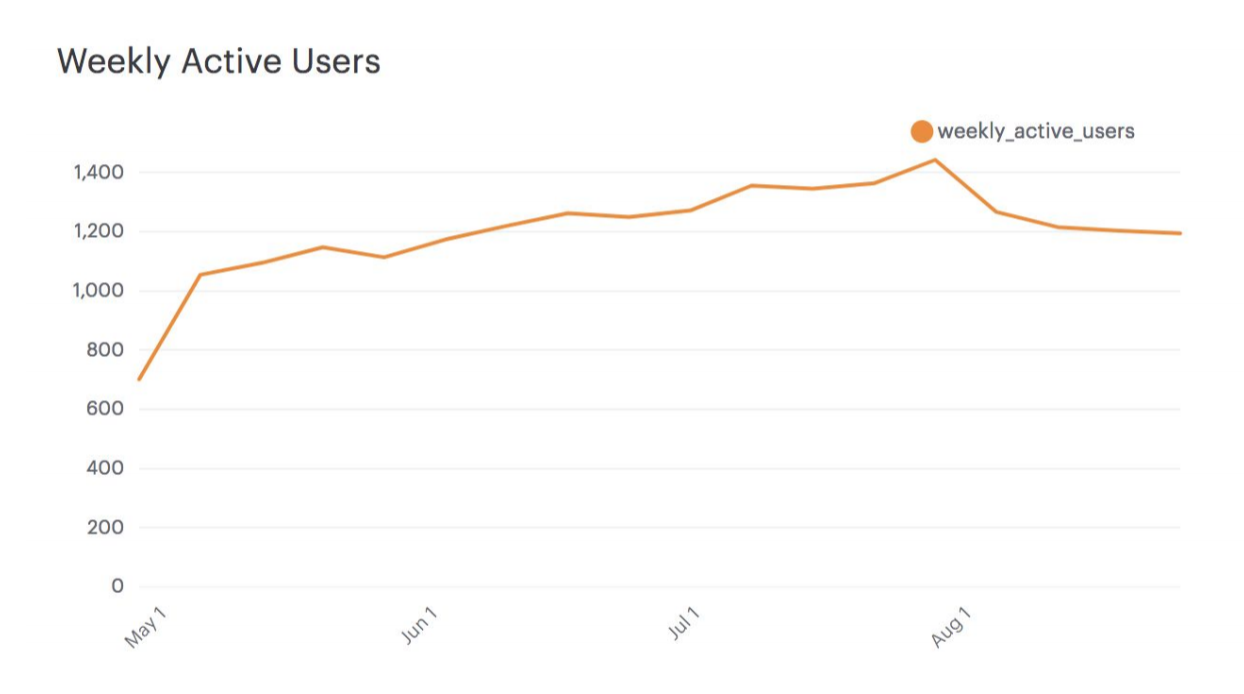

## Problem: What caused the drop in user engagement? Based on what you observe in the data, what recommendations would you make to the organization?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Let's start with importing data
yammer_emails = pd.read_csv("yammer_emails.csv")
yammer_emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [3]:
yammer_events_1 = pd.read_csv("yammer_events_1.csv")
yammer_events_2 = pd.read_csv("yammer_events_2.csv")
yammer_events = pd.concat([yammer_events_1, yammer_events_2])
yammer_events.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [4]:
yammer_events.drop(['Unnamed: 0'],axis = 1,inplace = True)
yammer_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [5]:
yammer_users = pd.read_csv('yammer_users.csv')
yammer_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [6]:
dimension_rollup_periods = pd.read_csv('dimension_rollup_periods.csv')
dimension_rollup_periods.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1.0,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1.0,2013-01-03 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1.0,2013-01-04 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1.0,2013-01-05 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-05 08:00:00,2013-01-06 08:00:00


## Weekly user engagement


In [7]:
yammer_events['occurred_at'] = pd.to_datetime(yammer_events['occurred_at'])
yammer_events.head()


,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [8]:
engaged = yammer_events[yammer_events['event_type']=='engagement']
engaged.set_index('occurred_at',inplace=True)
weekly_user = engaged.groupby(pd.Grouper(freq='W')).user_id.nunique()
weekly_user

occurred_at
2014-05-04     701
2014-05-11    1054
2014-05-18    1094
2014-05-25    1147
2014-06-01    1113
2014-06-08    1173
2014-06-15    1219
2014-06-22    1263
2014-06-29    1249
2014-07-06    1271
2014-07-13    1355
2014-07-20    1345
2014-07-27    1363
2014-08-03    1443
2014-08-10    1266
2014-08-17    1215
2014-08-24    1203
2014-08-31    1194
Freq: W-SUN, Name: user_id, dtype: int64

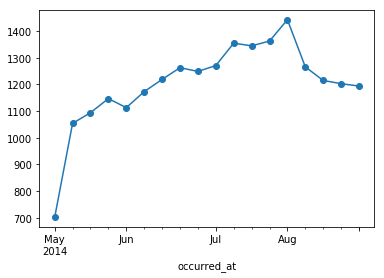

In [9]:
weekly_user.plot(style='o-')

## drop by 200 in 2014-8-3 to 2014-8-9

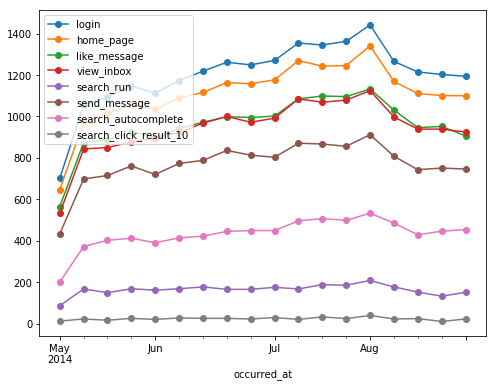

In [10]:
event_names = engaged.event_name.unique().tolist()[0:8]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for event_name in event_names:
    event_sign_up = engaged[engaged['event_name']==event_name].groupby(pd.Grouper(freq='W')).user_id.nunique()
    event_sign_up.plot(style='o-',ax=ax)
plt.legend(event_names,loc='upper left')

In [89]:
event_names = engaged.event_name.unique().tolist()
event_names

['login',
 'home_page',
 'like_message',
 'view_inbox',
 'search_run',
 'send_message',
 'search_autocomplete',
 'search_click_result_10',
 'search_click_result_7',
 'search_click_result_8',
 'search_click_result_1',
 'search_click_result_3',
 'search_click_result_2',
 'search_click_result_5',
 'search_click_result_6',
 'search_click_result_9',
 'search_click_result_4']

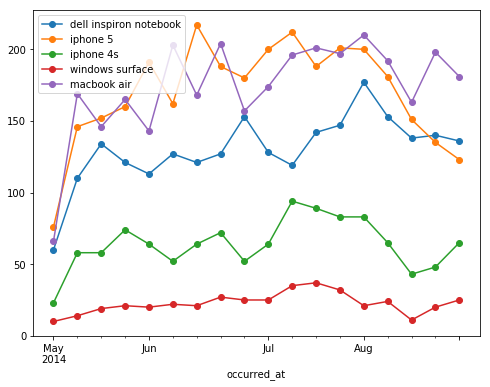

In [67]:
engaged_event = engaged[engaged['event_name']=='login']
devices = engaged_event.device.unique().tolist()[0:5]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for device in devices:
    event_device = engaged_event[engaged_event['device']==device].groupby(pd.Grouper(freq='W')).user_id.count()
    event_device.plot(style='o-',ax=ax)
plt.legend(devices,loc='upper left')

## Explore users

In [12]:
yammer_users.shape

(19066, 6)

In [13]:
yammer_users.state.unique()

array(['active', 'pending'], dtype=object)

In [14]:
yammer_users['created_at']=pd.to_datetime(yammer_users['created_at'])
yammer_users['activated_at']=pd.to_datetime(yammer_users['activated_at'])

In [15]:
yammer_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaT,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaT,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [16]:
# let's group find the total number of new created and new activated users in each week
activate_rate = yammer_users[['user_id','activated_at']].groupby([yammer_users["created_at"].dt.year,yammer_users["created_at"].dt.week]).count()
activate_rate['rate'] = activate_rate['activated_at']/activate_rate['user_id']
activate_rate.rename(columns={'user_id': "created", 'activated_at': "activated"},inplace=True)
activate_rate.tail(7)

created  activated      rate
created_at created_at                              
2014       29              426        215  0.504695
           30              458        228  0.497817
           31              476        234  0.491597
           32              406        189  0.465517
           33              473        250  0.528541
           34              468        259  0.553419
           35              514        266  0.517510

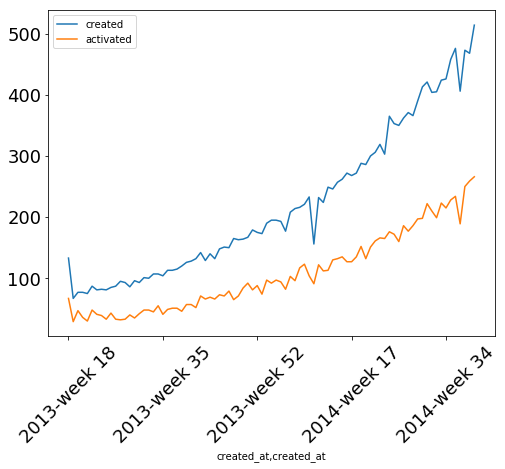

In [17]:
label_num = activate_rate.index.tolist()[0:-1:17]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.tick_params(labelsize=18)
ax = activate_rate[['created','activated']].plot(ax = ax)
#ax.set_xticks(range(len(activate_rate)));
ax.set_xticklabels(["%s-week %02d" % item for item in label_num], rotation=45);


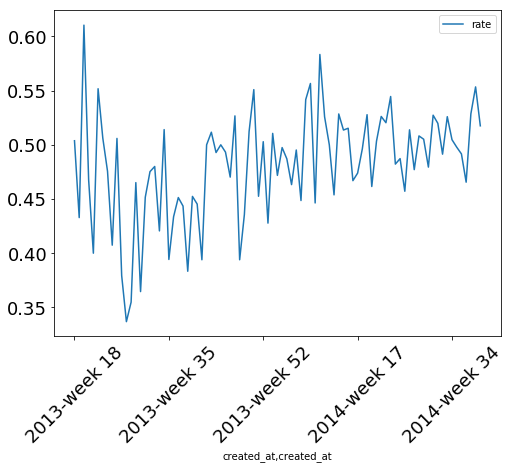

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.tick_params(labelsize=18)
activate_rate[['rate']].plot(ax = ax)
#ax.set_xticks(range(len(activate_rate)));
ax.set_xticklabels(["%s-week %02d" % item for item in label_num], rotation=45);

We found that the number of sign-up droped from 476 to 406 from week 31 to week 32. Almost no change in activation rate; the main issue is the total number of signing up then.

In [19]:
# Let's take a close look at the last few weeks
activate_rate_week32 = yammer_users[(yammer_users['created_at']>'2014-07-20')]
activate_rate_week32 = activate_rate_week32[(activate_rate_week32['created_at']<'2014-08-20')]
activate_rate_week32.head()

,user_id,created_at,company_id,language,activated_at,state
16251,16251.0,2014-07-20 18:54:01,12798.0,italian,NaT,pending
16252,16252.0,2014-07-20 18:50:08,138.0,italian,NaT,pending
16253,16253.0,2014-07-20 13:25:48,146.0,english,2014-07-20 13:27:10,active
16254,16254.0,2014-07-20 11:35:47,4484.0,chinese,2014-07-20 11:37:24,active
16255,16255.0,2014-07-20 16:25:58,56.0,spanish,2014-07-20 16:27:24,active


In [20]:
# convert to every day activity
activate_rate_tail = activate_rate_week32[['user_id','activated_at']].groupby(activate_rate_week32["created_at"].dt.date).count()
activate_rate_tail.rename(columns={'user_id': "created", 'activated_at': "activated"},inplace=True)
activate_rate_tail.head()

,created,activated
created_at,,
2014-07-20,20,9
2014-07-21,77,37
2014-07-22,79,38
2014-07-23,89,46
2014-07-24,78,40


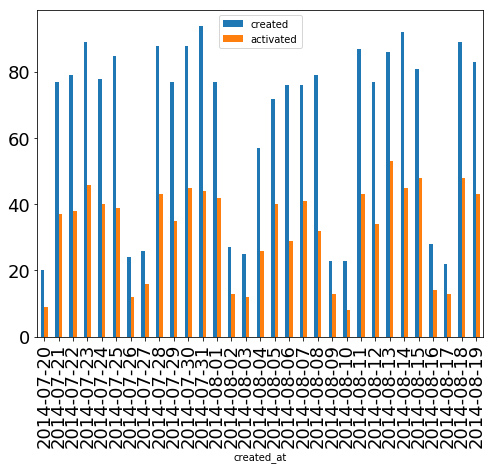

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.tick_params(labelsize=18)
activate_rate_tail.plot(ax=ax,kind='bar')
#labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_xticklabels(labels,rotation=45)

### Immediately, we can tell that the total new sign-up users are smaller during the whole week of 08/03-08/9.

## Is it related to a specific language?

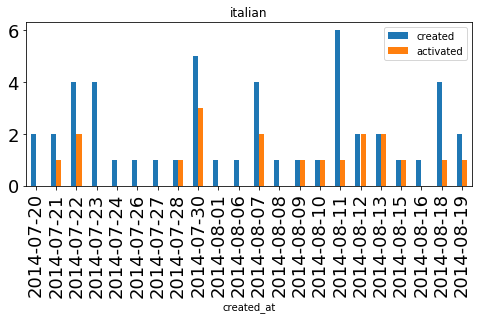

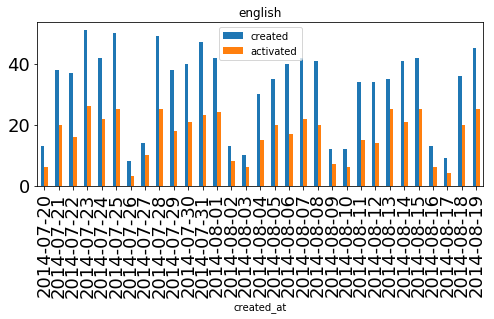

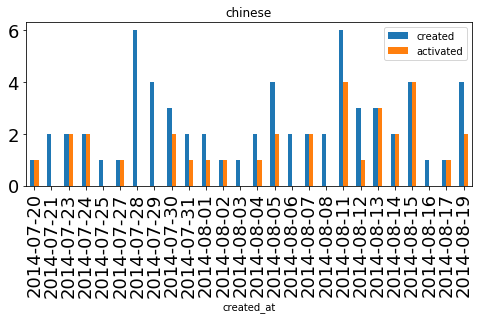

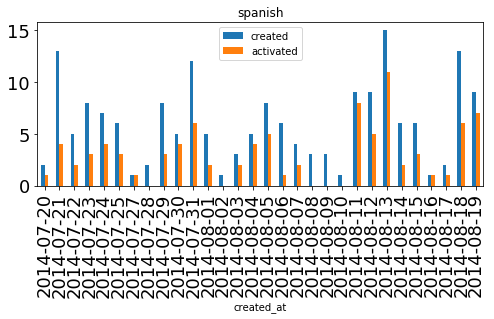

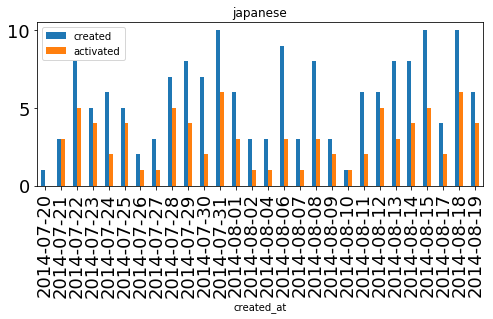

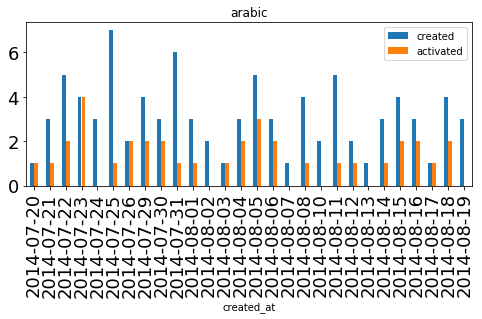

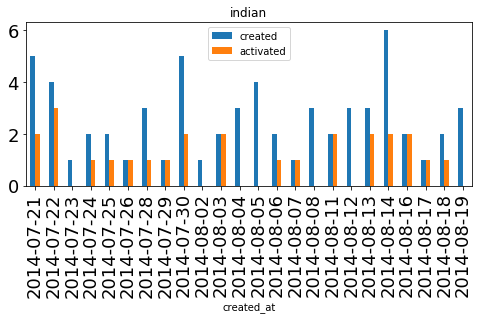

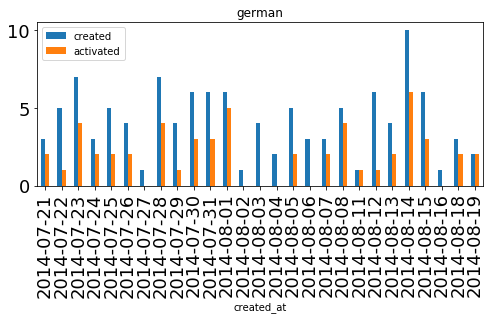

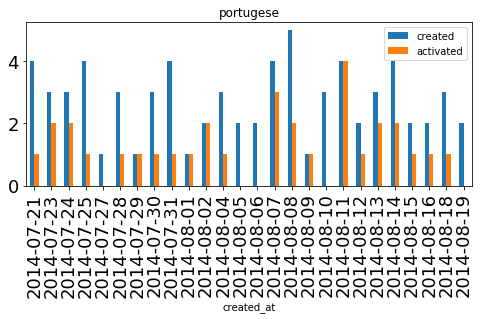

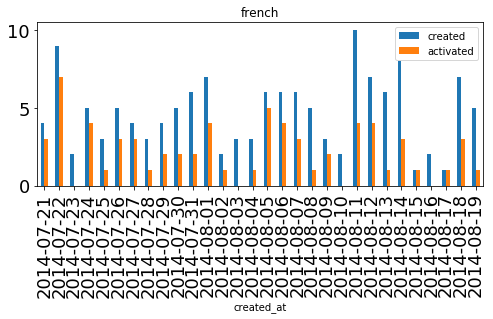

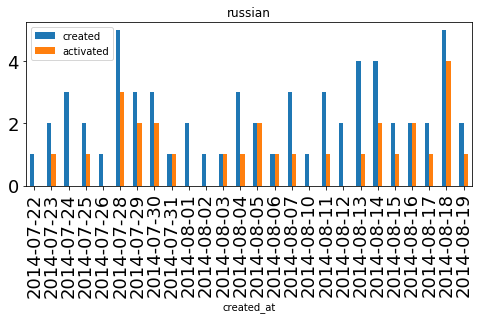

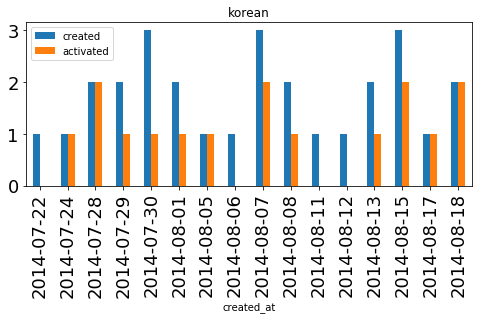

In [22]:
labels = [item.get_text() for item in ax.get_xticklabels()]
languages = activate_rate_week32.language.unique().tolist()
for language in languages:
    sub_df = activate_rate_week32[activate_rate_week32['language']==language]
    sub_df_group = sub_df[['user_id','activated_at']].groupby(sub_df["created_at"].dt.date).count()
    sub_df_group.rename(columns={'user_id': "created", 'activated_at': "activated"},inplace=True)
    label_num = activate_rate_tail.index.astype(str)

    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    plt.tick_params(labelsize=18)
    plt.title(language)
    sub_df_group.plot(ax=ax,kind='bar')

    

## So no major differences are observed among languages. Now let's explore the events happened during 08/04-08/10

## Explore events

In [23]:
yammer_events['occurred_at'] = pd.to_datetime(yammer_events['occurred_at'])
yammer_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


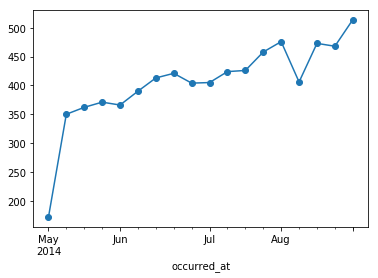

In [24]:
signup_events = yammer_events[yammer_events['event_type']=='signup_flow']
signup_events.set_index('occurred_at',inplace=True)
weekly_signup = signup_events.groupby(pd.Grouper(freq='W')).user_id.nunique()
weekly_signup.plot(style = 'o-')

In [25]:
# the event names related to sign up
signup_events.event_name.unique()

array(['create_user', 'enter_email', 'enter_info', 'complete_signup'],
      dtype=object)

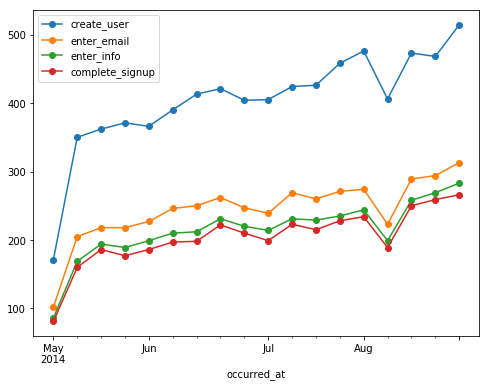

In [26]:
event_names = signup_events.event_name.unique().tolist()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for event_name in event_names:
    event_sign_up = signup_events[signup_events['event_name']==event_name].groupby(pd.Grouper(freq='W')).user_id.nunique()
    event_sign_up.plot(ax=ax,style = 'o-')
plt.legend(event_names)


## check email event

In [27]:
yammer_emails['occurred_at'] = pd.to_datetime(yammer_emails['occurred_at'])
yammer_emails.set_index('occurred_at',inplace = True)


In [28]:
yammer_emails.head()

,user_id,action,user_type
occurred_at,,,
2014-05-06 09:30:00,0.0,sent_weekly_digest,1.0
2014-05-13 09:30:00,0.0,sent_weekly_digest,1.0
2014-05-20 09:30:00,0.0,sent_weekly_digest,1.0
2014-05-27 09:30:00,0.0,sent_weekly_digest,1.0
2014-06-03 09:30:00,0.0,sent_weekly_digest,1.0


In [29]:
yammer_emails.action.unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

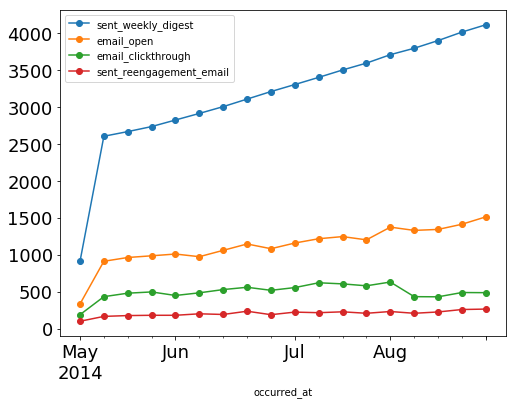

In [30]:
actions = yammer_emails.action.unique().tolist()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for action in actions:
    email_actions = yammer_emails[yammer_emails['action']==action].groupby(pd.Grouper(freq='W')).user_id.nunique()
    email_actions.plot(ax=ax,style='o-')

plt.tick_params(labelsize=18)
plt.legend(actions)


## We see that there is a drop in email click through in August

In [31]:
action = 'email_clickthrough'
email_actions = yammer_emails[yammer_emails['action']==action].groupby(pd.Grouper(freq='W')).user_id.nunique()
email_actions

occurred_at
2014-05-04    187
2014-05-11    431
2014-05-18    478
2014-05-25    495
2014-06-01    447
2014-06-08    483
2014-06-15    527
2014-06-22    558
2014-06-29    517
2014-07-06    554
2014-07-13    619
2014-07-20    604
2014-07-27    578
2014-08-03    629
2014-08-10    431
2014-08-17    429
2014-08-24    487
2014-08-31    485
Freq: W-SUN, Name: user_id, dtype: int64

## The number of users who click the email link drops from 629 to 431 in week of 2014-08-03. So one advice is that to write more attractive emails to encourage user engagement.

## Now let's check if it is related to device or language.

In [45]:
#users who click the email link
email_click_through = yammer_emails[yammer_emails['action']=='email_clickthrough']
email_click_through.reset_index(inplace = True)
email_click_through = email_click_through.merge(yammer_users, left_on='user_id', right_on='user_id')
email_click_through.set_index('occurred_at',inplace = True)

email_click_through.head()

,user_id,action,user_type,created_at,company_id,language,activated_at,state
occurred_at,,,,,,,,
2014-05-13 09:31:07,4.0,email_clickthrough,3.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active
2014-05-20 09:31:00,4.0,email_clickthrough,3.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active
2014-06-24 09:31:06,4.0,email_clickthrough,3.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active
2014-07-01 09:30:41,4.0,email_clickthrough,3.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active
2014-07-29 09:30:53,8.0,email_clickthrough,3.0,2013-01-01 04:38:30,2698.0,french,2013-01-01 04:40:10,active


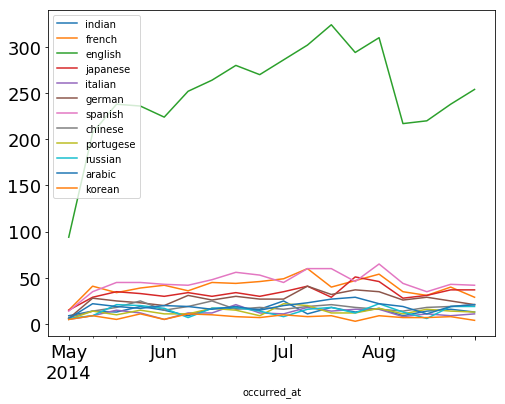

In [55]:
#the user_ids that have clicked the link
languages = email_click_through.language.unique().tolist()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for language in languages:
    click_language = email_click_through[email_click_through['language']==language].groupby(pd.Grouper(freq='W')).user_id.nunique()
    click_language.plot(ax=ax)

plt.tick_params(labelsize=18)
plt.legend(languages,loc='upper left')


In [50]:
language = 'english'
click_language = email_click_through[email_click_through['language']==language].groupby(pd.Grouper(freq='W')).user_id.nunique()
click_language


occurred_at
2014-05-04     94
2014-05-11    207
2014-05-18    238
2014-05-25    236
2014-06-01    224
2014-06-08    252
2014-06-15    264
2014-06-22    280
2014-06-29    270
2014-07-06    286
2014-07-13    302
2014-07-20    324
2014-07-27    294
2014-08-03    310
2014-08-10    217
2014-08-17    220
2014-08-24    238
2014-08-31    254
Freq: W-SUN, Name: user_id, dtype: int64

## English is the main language, but there are other languages as well. It worth improve in different languages.


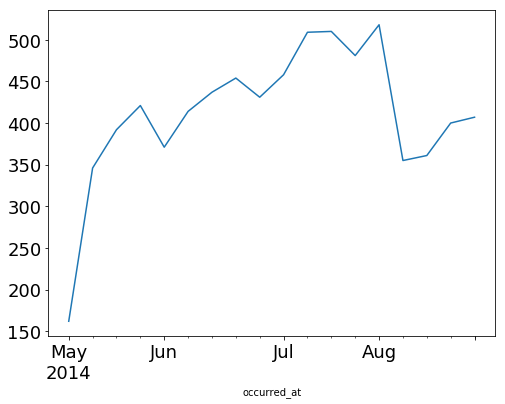

In [84]:
#how about the company
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


click_company = email_click_through.groupby(pd.Grouper(freq='W')).company_id.nunique()
click_company.plot(ax=ax)

plt.tick_params(labelsize=18)


## Now check the device

In [70]:
#users who click the email link
email_click_through_device = yammer_emails[yammer_emails['action']=='email_clickthrough']
email_click_through_device.reset_index(inplace = True)
email_click_through_device = email_click_through_device.merge(yammer_events, left_on='user_id', right_on='user_id')
email_click_through_device.set_index('occurred_at_x',inplace = True)

email_click_through_device.head()


,user_id,action,user_type_x,occurred_at_y,event_type,event_name,location,device,user_type_y
occurred_at_x,,,,,,,,,
2014-05-13 09:31:07,4.0,email_clickthrough,3.0,2014-05-13 09:31:47,engagement,login,India,lenovo thinkpad,3.0
2014-05-13 09:31:07,4.0,email_clickthrough,3.0,2014-05-13 09:32:10,engagement,home_page,India,lenovo thinkpad,3.0
2014-05-13 09:31:07,4.0,email_clickthrough,3.0,2014-05-13 09:32:26,engagement,search_autocomplete,India,lenovo thinkpad,3.0
2014-05-13 09:31:07,4.0,email_clickthrough,3.0,2014-05-13 09:32:58,engagement,search_autocomplete,India,lenovo thinkpad,3.0
2014-05-13 09:31:07,4.0,email_clickthrough,3.0,2014-05-24 11:39:53,engagement,login,India,samsung galaxy s4,3.0


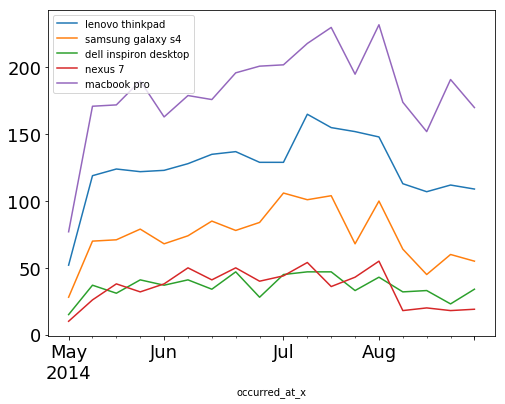

In [75]:
#the user_ids that have clicked the link
devices = email_click_through_device.device.unique().tolist()[0:5]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for device in devices:
    click_device = email_click_through_device[email_click_through_device['device']==device].groupby(pd.Grouper(freq='W')).user_id.nunique()
    click_device.plot(ax=ax)

plt.tick_params(labelsize=18)
plt.legend(devices,loc='upper left')


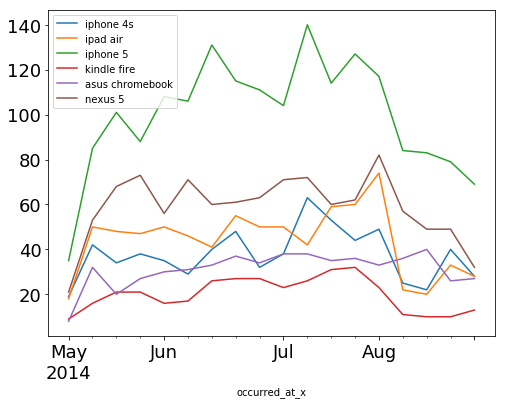

In [77]:
#the user_ids that have clicked the link
devices = email_click_through_device.device.unique().tolist()[6:12]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for device in devices:
    click_device = email_click_through_device[email_click_through_device['device']==device].groupby(pd.Grouper(freq='W')).user_id.nunique()
    click_device.plot(ax=ax)

plt.tick_params(labelsize=18)
plt.legend(devices,loc='upper left')
